# Salary Prediction using Linear Regression

In [2]:
import pandas as pd 
from matplotlib import pyplot as plt 

In [3]:
df = pd.read_csv("Salary Data.csv", sep=',')
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


# EDA

In [5]:
df.isnull().sum()

Experience Years    0
Salary              0
dtype: int64

Text(0.5, 1.0, 'Salary Prediction Graph')

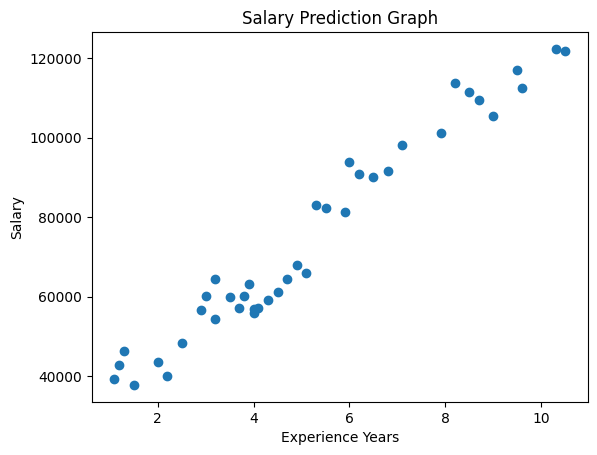

In [6]:
plt.scatter(df['Experience Years'],df['Salary'])
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Salary Prediction Graph')

In [7]:
x=df[['Experience Years']]
x

,Experience Years
0,1.1
1,1.2
2,1.3
3,1.5
4,2.0
5,2.2
6,2.5
7,2.9
8,3.0
9,3.2


In [14]:
y=df[['Salary']]
y

,Salary
0,39343
1,42774
2,46205
3,37731
4,43525
5,39891
6,48266
7,56642
8,60150
9,54445


# Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg=LinearRegression()

In [12]:
x.mean()

Experience Years    5.1525
dtype: float64

In [15]:
y.mean()

Salary    74743.625
dtype: float64

Text(0.5, 1.0, 'Experience-Year')

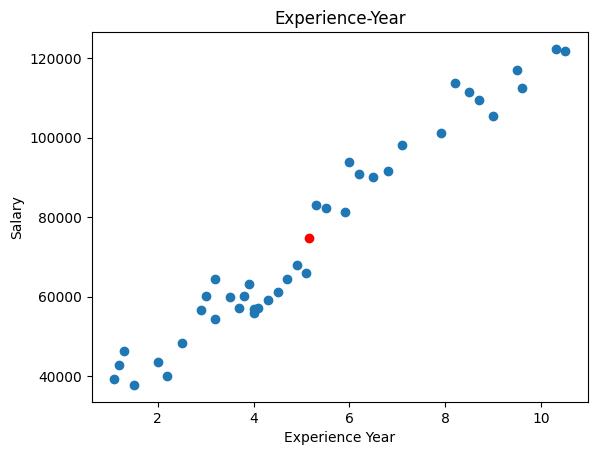

In [16]:
plt.scatter(x.mean() , y.mean(), color='red')
plt.scatter(df['Experience Years'] , df['Salary'])
plt.xlabel('Experience Year')
plt.ylabel('Salary')
plt.title('Experience-Year')

In [17]:
# for train the model
reg.fit(x,y)

LinearRegression()

In [18]:
m = reg.coef_
m

array([[9523.65050742]])

In [19]:
c = reg.intercept_
c

array([25673.01576053])

In [20]:
df['Predicted Y']=reg.predict(x)
df.head()

,Experience Years,Salary,Predicted Y
0,1.1,39343,36149.031319
1,1.2,42774,37101.396369
2,1.3,46205,38053.761420
3,1.5,37731,39958.491522
4,2.0,43525,44720.316775


Text(0.5, 1.0, 'Experience vs Salary')

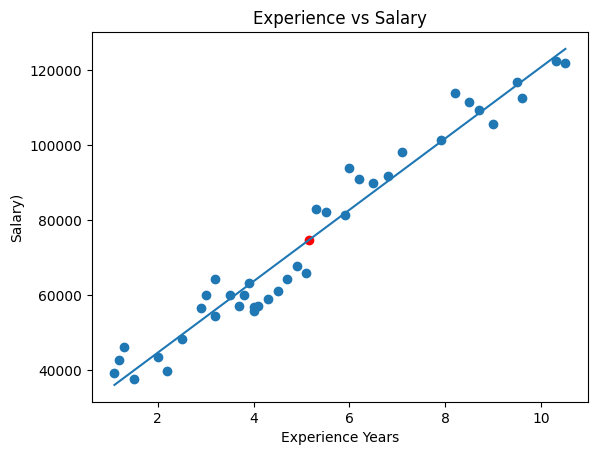

In [21]:
plt.plot(x, reg.predict(x))
plt.scatter(x.mean() , y.mean(), color='red')
plt.scatter(df['Experience Years'] , df['Salary'])
plt.xlabel('Experience Years')
plt.ylabel('Salary)')
plt.title('Experience vs Salary')

In [22]:
reg.predict([[6]])

c:\Users\imahb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[82814.91880504]])

In [23]:
df.head()

,Experience Years,Salary,Predicted Y
0,1.1,39343,36149.031319
1,1.2,42774,37101.396369
2,1.3,46205,38053.761420
3,1.5,37731,39958.491522
4,2.0,43525,44720.316775


# Cost & Lose

In [24]:
df['loss'] = df['Salary'] - df['Predicted Y']
df.head()

,Experience Years,Salary,Predicted Y,loss
0,1.1,39343,36149.031319,3193.968681
1,1.2,42774,37101.396369,5672.603631
2,1.3,46205,38053.761420,8151.238580
3,1.5,37731,39958.491522,-2227.491522
4,2.0,43525,44720.316775,-1195.316775


In [25]:
#MSE and mae
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
mse = mean_squared_error(df['Salary'], df['Predicted Y'])
mse

28960383.65377621

In [27]:
mae = mean_absolute_error(df['Salary'], df['Predicted Y'])
mae
# sum(abs(df['loss'])) / len(x)

4516.281792544623

In [28]:
reg.score(x,y)

0.9558814451799361

Text(0.5, 1.0, 'Experience Years vs Salary')

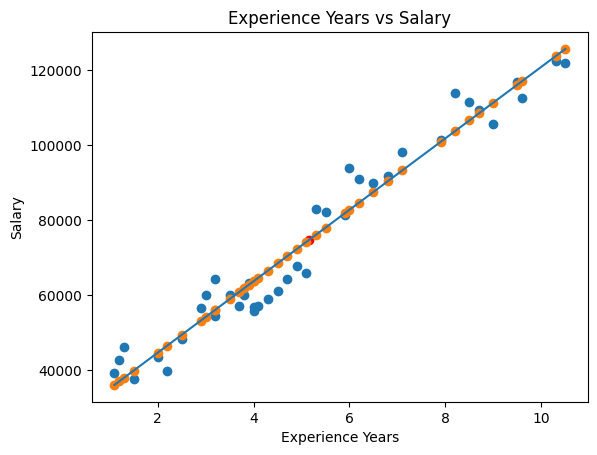

In [29]:
#plt.plot(x, df['Predicted_y'])
plt.plot(x, reg.predict(x))
plt.scatter(x.mean() , y.mean(), color='red')
plt.scatter(df['Experience Years'] , df['Salary'])
plt.scatter(df['Experience Years'] , reg.predict(x))
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Experience Years vs Salary')

In [30]:
# another way to get r2

In [31]:
from sklearn.metrics import r2_score
r2_score(y, reg.predict(x))

0.9558814451799361

In [32]:
# so the percentages is 95%